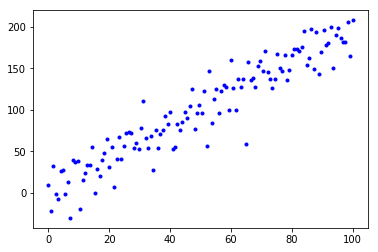

In [17]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
#import visuals as vs
import dataset_utils as utils
import random as rdm

np.random.seed(1234)
def dataSetFunction(x):
    return 2*x + 1*np.random.normal(scale = 20)        

df = utils.createDataset(0, 100, 0.8, dataSetFunction )  


features = df["x"]
values = df["y"]

plt.scatter(features, values, color="#0000ff", marker='.')  
plt.show() 



In [8]:
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( features,  values, test_size=0.2, random_state=546544)
print "Training and testing split was successful."


Training and testing split was successful.


In [9]:
# Performance metrics
from sklearn.metrics import fbeta_score, make_scorer
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    import sklearn.metrics as metrics
    score = metrics.r2_score(y_true, y_predict)
    # Return the score
    return score

### Fitting the model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.1, train_size=0.1, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = LinearRegression()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'normalize': [True, False]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc =  make_scorer(performance_metric)
    

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid= params, scoring = scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [13]:

# Fit the training data to the model using grid search
reg = fit_model(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Produce the value for 'max_depth'
print "Optimal parameters: {}".format(reg.get_params(deep=True))

Optimal parameters: {'copy_X': True, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True}


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


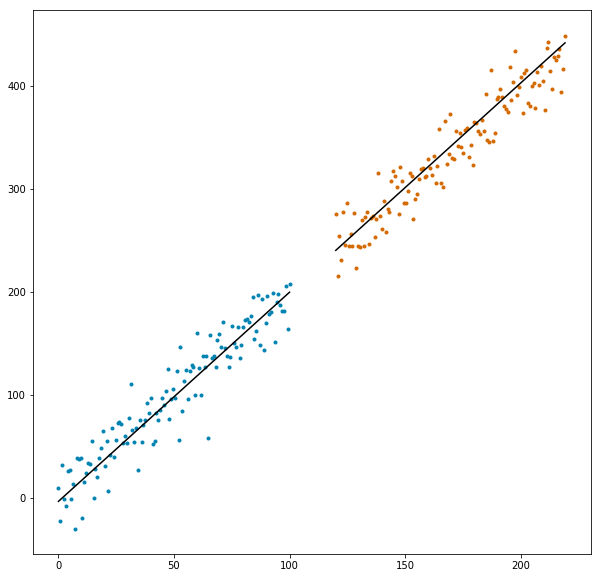

R2 Score 0.894322337407 
R2 Score 0.891203750894 


In [20]:
from sklearn.metrics import r2_score

dfPredictions = utils.predictDataset(0, 100, 0.8, reg)
dfPredictions2 = utils.predictDataset(120, 220, 0.8, reg)

#Predicting new data
df2 = utils.createDataset(120, 220, 0.8, dataSetFunction)  
features2 = df2["x"]
values2 = df2["y"]



fig, ax = plt.subplots(figsize=(10, 10))
#Trained Data
ax.scatter(features, values, color='#0083B2', marker='.') 
ax.plot(features ,dfPredictions[['y']], color='#000000')

dfPredictions2[['y']].head()

#New Data
ax.scatter(features2, values2, color='#D46900', marker='.')  
ax.plot(features2, dfPredictions2[['y']], color='#000000')


plt.show() 


print "R2 Score {} ".format(r2_score(values, dfPredictions))
print "R2 Score {} ".format(r2_score(values2, dfPredictions2))